In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
demo_all = pd.read_csv('data/data/demo_all.csv')

diet_all = pd.read_csv('data/data/diet_all.csv')

exam_all = pd.read_csv('data/data/exam_all.csv')

labs_all = pd.read_csv('data/data/labs_all.csv')

questionnaire_all = pd.read_csv('data/data/questionnaire_all.csv')

In [4]:
# data = questionnaire_all.merge(demo_all, how='left', on='SEQN')
# data = data.merge(diet_all, how='left', on='SEQN')
# data = data.merge(exam_all, how='left', on='SEQN')
# data = data.merge(labs_all, how='left', on='SEQN')

### How many pople have congestive heart failure, coronary heart disease, heart attack or stroke?

In [206]:
data = questionnaire_all

In [207]:
count1 = data[data['MCQ160B'] == 1]['MCQ160B'].count()

count2 = data[data['MCQ160C'] == 1]['MCQ160B'].count()

count3 = data[data['MCQ160E'] == 1]['MCQ160B'].count()

count4 = data[data['MCQ160F'] == 1]['MCQ160B'].count()

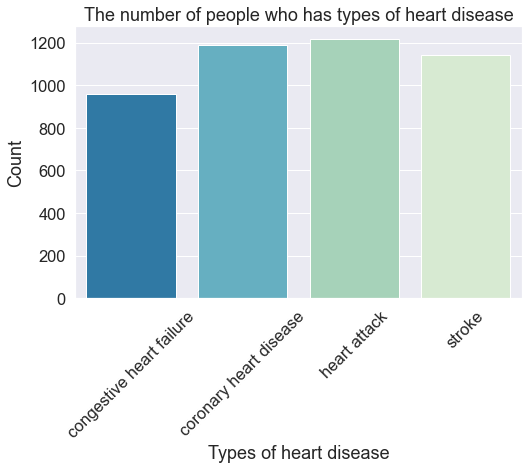

In [208]:
plt.figure(figsize=(8, 5))
labels = ['congestive heart failure', 'coronary heart disease', 'heart attack', 'stroke']
plotlabs = [count1,count2,count3,count4]
ax = sns.barplot(x=labels, y=plotlabs, palette='GnBu_r')
ax.set_title('The number of people who has types of heart disease')
ax.set_xlabel('Types of heart disease')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

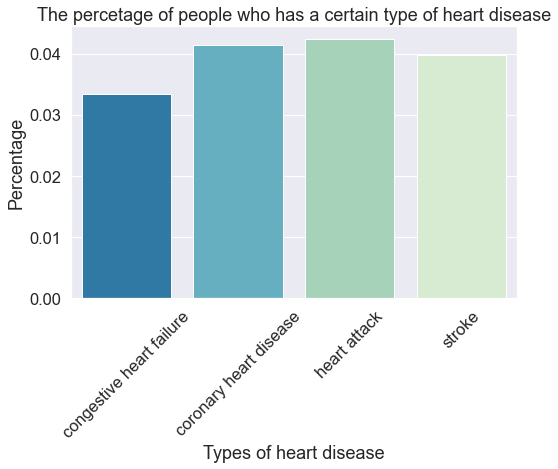

In [210]:
plt.figure(figsize=(8, 5))
labels = ['congestive heart failure', 'coronary heart disease', 'heart attack', 'stroke']
plotlabs = [count1/data.shape[0],count2/data.shape[0],count3/data.shape[0],count4/data.shape[0]]
ax = sns.barplot(x=labels, y=plotlabs, palette='GnBu_r')
ax.set_title('The percetage of people who has a certain type of heart disease')
ax.set_xlabel('Types of heart disease')
ax.set_ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

### Is there a correlation between gender and CVD

In [5]:
data = questionnaire_all.merge(demo_all,how='left', on='SEQN')
gender = data[['RIAGENDR', 'Target']].dropna(how='any')

contingency_table = pd.crosstab(
    gender['RIAGENDR'],
    gender['Target'],
    margins=True, 
    rownames=['Gender'],
    colnames=['CVD Indicator']
)
contingency_table

CVD Indicator,0.0,1.0,All
Gender,,,
1.0,12206,1690,13896
2.0,13558,1268,14826
All,25764,2958,28722


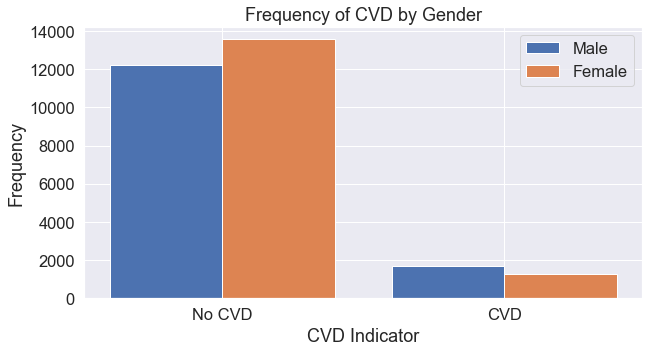

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1.5)

malecount = contingency_table.iloc[0][0:2].values
femalecount = contingency_table.iloc[1][0:2].values

categories = ["No CVD","CVD"]
x = np.arange(len(categories))

bar_width = 0.4
b1 = ax.bar(x, malecount, 
            width=bar_width, label='Male')
b2 = ax.bar(x + bar_width, femalecount, 
            width=bar_width, label='Female')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)

# Label the plot.
plt.legend()
ax.set_title('Frequency of CVD by Gender')
ax.set_xlabel('CVD Indicator')
ax.set_ylabel('Frequency')
plt.show()

H0 : There is no statistically significant relationship between gender and CVD.

H1: There is a statistically significant relationship between gender and CVD.

In [8]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
chi2, p, dof, expected = stats.chi2_contingency(f_obs)
print('chi-square statistic = ',chi2, '\np-value = ', p, '\ndegrees of freedom = ', dof, '\nexpected values = ', expected)


chi-square statistic =  100.7551062291854 
p-value =  1.0408900554490216e-23 
degrees of freedom =  1 
expected values =  [[12464.88907458  1431.11092542]
 [13299.11092542  1526.88907458]]


### Is there a correlation between age and CVD?

In [30]:
data = questionnaire_all.merge(demo_all, how='left', on='SEQN')

In [31]:
age_corr = data[['RIDAGEYR','Target']]

In [32]:
age = pd.cut(age_corr['RIDAGEYR'],bins=4,right=False)

In [33]:
age_corr1 = age_corr[age_corr['Target'] == 1]

In [34]:
age_corr1['Age'] = age

<ipython-input-34-e7979cf99e13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_corr1['Age'] = age


Text(0.5, 1.0, 'The ages of people have CVD')

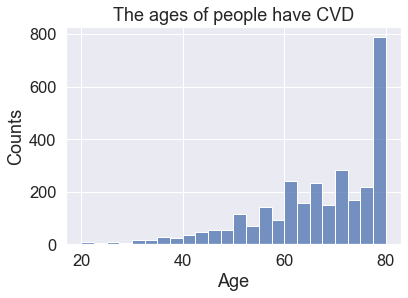

In [35]:
sns.histplot(x='RIDAGEYR',data=age_corr1)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('The ages of people have CVD')

In [36]:
age_corr['Age'] = age

<ipython-input-36-e57b7b87213c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_corr['Age'] = age


In [37]:
contingency_table = pd.crosstab(
    age_corr['Age'],
    age_corr['Target'],
    margins=True, 
    rownames=['AGE'],
    colnames=['CVD']
)
contingency_table

CVD,0.0,1.0,All
AGE,,,
"[20.0, 35.0)",7200,62,7262
"[35.0, 50.0)",6895,243,7138
"[50.0, 65.0)",6602,815,7417
"[65.0, 80.06)",5067,1838,6905
All,25764,2958,28722


H0 : There is no statistically significant relationship between age and CVD.

H1: There is a statistically significant relationship between age and CVD.

In [38]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values,
                 contingency_table.iloc[3][0:2].values])

chi2, p, dof, expected = stats.chi2_contingency(f_obs)
print('chi-square statistic = ',chi2, '\np-value = ', p, '\ndegrees of freedom = ', dof, '\nexpected values = ', expected)

chi-square statistic =  3063.0359749753093 
p-value =  0.0 
degrees of freedom =  3 
expected values =  [[6514.10653854  747.89346146]
 [6402.87695843  735.12304157]
 [6653.14351368  763.85648632]
 [6193.87298935  711.12701065]]


### Is there a correlation between Sodium and Heart Fealure?

In [244]:
Sodium = questionnaire_all.merge(diet_all, how='left', on='SEQN')

In [245]:
Sodium = Sodium[['Target','DR1TSODI']]

In [246]:
Sodium = Sodium.dropna()

Text(0, 0.5, 'Sodium (mg)')

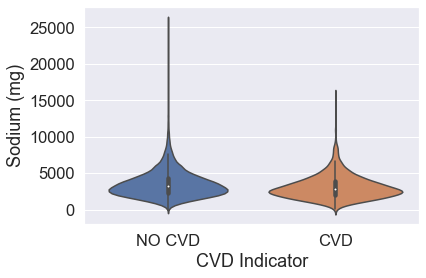

In [250]:
chart = sns.violinplot(x="Target", y="DR1TSODI", data=Sodium)

chart.set_xticklabels(['NO CVD','CVD'])

chart.set_xlabel('CVD Indicator')

plt.ylabel('Sodium (mg)')


H0 : The means of Triglycerides of participants with No Diabetes and Prediabetes indicators are the same.

Ha: The means of Triglycerides of participants with No Diabetes and Prediabetes indicators are different.

In [251]:
a = Sodium[Sodium['Target']==0]['DR1TSODI']
b = Sodium[Sodium['Target']==1]['DR1TSODI']

# Use scipy ttest_ind to perform two tailed test. 
t_value, p_value = stats.ttest_ind(a, b, equal_var=False)
t_value, p_value

(12.331463042256566, 3.333964929848696e-34)

In [278]:
Xtrain = Sodium[['DR1TSODI']]
ytrain = Sodium[['Target']]

import statsmodels.api as sm
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.351399
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                25276
Model:                          Logit   Df Residuals:                    25275
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Sep 2021   Pseudo R-squ.:                -0.07142
Time:                        15:26:00   Log-Likelihood:                -8882.0
converged:                       True   LL-Null:                       -8289.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DR1TSODI      -0.0006   7.04e-06    -91.991      0.000      -0.001      -0.001


### Is there a correlation between CHOL  and CVD?

H0 : The means of Systolic Blood Pressure of participants with No Diabetes and Heart Fealure are the same.

Ha: The means of Systolic Blood Pressure of participants with No Diabetes and Heart Fealure are different.

In [316]:
data = questionnaire_all.merge(diet_all, how='left', on='SEQN')

In [317]:
data = data[['Target','DR1TCHOL']]

In [318]:
data = data.dropna()

Text(0, 0.5, 'Cholesterol (gm)')

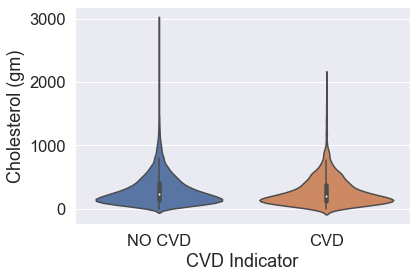

In [324]:
chart = sns.violinplot(x="Target", y="DR1TCHOL", data=data)

chart.set_xticklabels(['NO CVD','CVD'])

chart.set_xlabel('CVD Indicator')

plt.ylabel('Cholesterol (gm)')


In [325]:
a = data[data['Target']==0]['DR1TCHOL']
b = data[data['Target']==1]['DR1TCHOL']

# Use scipy ttest_ind to perform two tailed test. 
t_value, p_value = stats.ttest_ind(a, b, equal_var=False)
t_value, p_value

(5.588965306944004, 2.4697891205824442e-08)

In [326]:
Xtrain = data[['DR1TCHOL']]
ytrain = data[['Target']]

import statsmodels.api as sm
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.410076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                25276
Model:                          Logit   Df Residuals:                    25275
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Sep 2021   Pseudo R-squ.:                 -0.2503
Time:                        20:37:31   Log-Likelihood:                -10365.
converged:                       True   LL-Null:                       -8289.9
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DR1TCHOL      -0.0069   8.65e-05    -80.221      0.000      -0.007      -0.007


Optimization terminated successfully.
         Current function value: 0.227910
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  448
Model:                          Logit   Df Residuals:                      447
Method:                           MLE   Df Model:                            0
Date:                Thu, 02 Sep 2021   Pseudo R-squ.:                -0.05876
Time:                        20:40:00   Log-Likelihood:                -102.10
converged:                       True   LL-Null:                       -96.437
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DR1TCHOL      -0.0022      0.000    -13.455      0.000      -0.003      -0.002


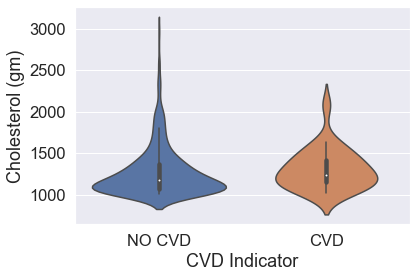

In [330]:
data = data[['Target','DR1TCHOL']]

data = data[data['DR1TCHOL']>1000]

chart = sns.violinplot(x="Target", y="DR1TCHOL", data=data)

chart.set_xticklabels(['NO CVD','CVD'])

chart.set_xlabel('CVD Indicator')

plt.ylabel('Cholesterol (gm)')


a = data[data['Target']==0]['DR1TCHOL']
b = data[data['Target']==1]['DR1TCHOL']

# Use scipy ttest_ind to perform two tailed test. 
t_value, p_value = stats.ttest_ind(a, b, equal_var=False)
t_value, p_value

Xtrain = data[['DR1TCHOL']]
ytrain = data[['Target']]

import statsmodels.api as sm
log_reg = sm.Logit(ytrain, Xtrain).fit()
print(log_reg.summary())
